In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler

# data cleaning 

In [4]:
train_data = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')
train_data = train_data.join(train_labels['damage_grade'])
train_data = pd.get_dummies(train_data)
dropped_columns = ['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
train_data = train_data.drop(dropped_columns, axis=1).dropna()
train_data = train_data.replace([np.inf, -np.inf], np.nan).dropna(how="any")

In [5]:
# removing outliers 
len(train_data["age"][train_data["age"] > 300]) / len(train_data["age"])
len(train_data["area_percentage"][train_data["area_percentage"] > 70]) / len(train_data["area_percentage"])
train_data = train_data[train_data["age"] < 500]
train_data = train_data[train_data["area_percentage"] < 70]

0.0053338245056619125

0.0001650032041319872

In [6]:
X = train_data.drop('damage_grade', axis=1)
y = train_data['damage_grade']

In [7]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >= 0.5)]
X = X.drop(X[to_drop], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [35]:
# from sklearn.decomposition import FastICA
pca = PCA(n_components=.95)
pca.fit(X_train)
X_transform = pca.transform(X_train)

In [47]:
pca.components_.shape

(40, 44)

/home/fztso1/IzODA/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


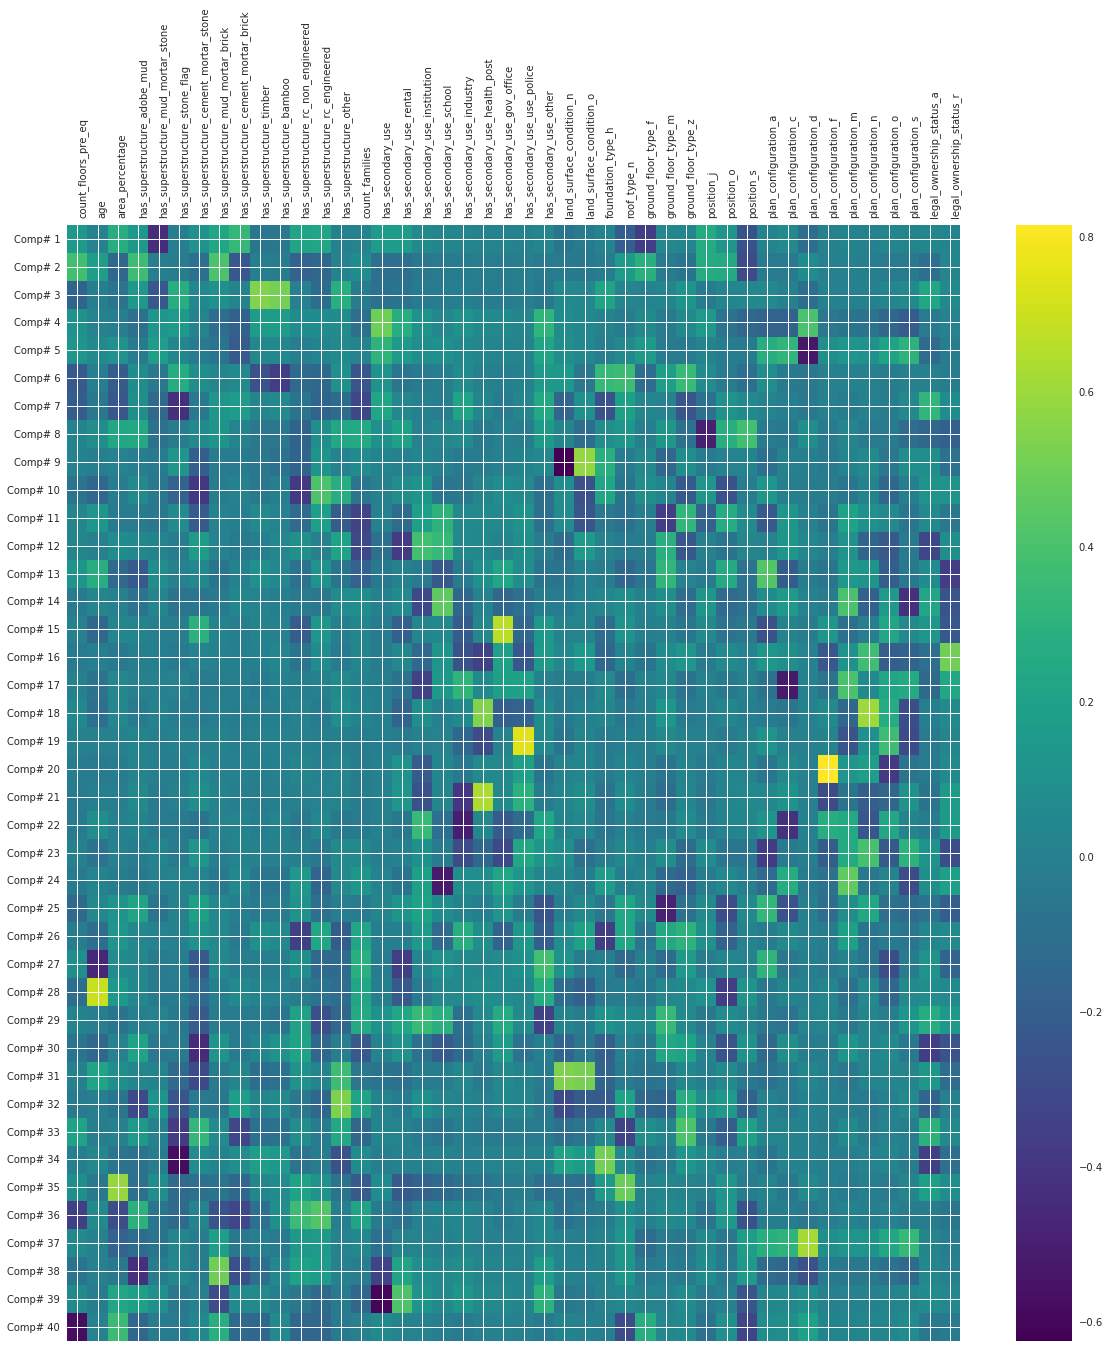

In [52]:
plt.figure(figsize=(20,20))
plt.matshow(pca.components_, cmap='viridis', fignum=1, aspect='auto')
labs = []
plt.yticks(range(40), [f'Comp# {i}' for i in range(1, 41)],fontsize=10)
plt.colorbar()
plt.xticks(range(44), np.array(X.columns),rotation=90,ha='left')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)
plt.show();

In [29]:
pca.components_ 

array([[ 0.14653258,  0.01469601,  0.27280332, ...,  0.02511765,
         0.03432048,  0.02460695],
       [ 0.3811041 ,  0.17557113, -0.14167188, ..., -0.02665769,
        -0.09707588,  0.03119389],
       [-0.15991276, -0.00259919, -0.06988886, ...,  0.05838927,
         0.22608751,  0.05963875],
       ...,
       [-0.07262859,  0.00280597, -0.05034354, ..., -0.12471269,
         0.04586133,  0.00399203],
       [ 0.05603957, -0.02204782,  0.22148327, ...,  0.0333438 ,
         0.06758643,  0.04217694],
       [-0.56989604,  0.01196735,  0.35399374, ...,  0.07241429,
        -0.04970103, -0.03213633]])

In [30]:
a = np.array(pca.components_[1])
np.where(a > 0.5)

(array([], dtype=int64),)

In [31]:
index = np.unique(np.concatenate([i[0] for i in [np.where(i > 0.5) for i in pca.components_]]))

In [32]:
X_reduced = X.iloc[:, index]

In [33]:
X_reduced

,age,area_percentage,has_superstructure_mud_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_other,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,land_surface_condition_n,land_surface_condition_o,foundation_type_h,plan_configuration_d,plan_configuration_f,plan_configuration_n,legal_ownership_status_r
0,30,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,10,8,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,10,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,10,6,0,1,1,0,0,0,0,0,0,0,1,0,0,0
4,30,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,55,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0
260597,0,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
260598,55,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
260599,10,14,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
X_reduced.columns

Index(['age', 'area_percentage', 'has_superstructure_mud_mortar_brick',
       'has_superstructure_timber', 'has_superstructure_bamboo',
       'has_superstructure_other', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'land_surface_condition_n', 'land_surface_condition_o',
       'foundation_type_h', 'plan_configuration_d', 'plan_configuration_f',
       'plan_configuration_n', 'legal_ownership_status_r'],
      dtype='object')

In [35]:
X_reduced.shape

(260601, 16)

In [36]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42, max_iter=500)
cross_val_score(logistic, X_train_reduced, y_train, cv=3)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([0.57697676, 0.58024549, 0.57747654])

In [38]:
logistic = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial', random_state=42, max_iter=500)
cross_val_score(logistic, X_train_reduced, y_train, cv=3)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([0.57596949, 0.57785676, 0.57727508])

In [39]:
mlp = MLPClassifier(activation='logistic', random_state=42)
mlp.fit(X_train_reduced, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [40]:
mlp.score(X_train_reduced, y_train)

0.6102120107444359

In [46]:
mlp.score(X_test_reduced, y_test)

0.6001995356957848

In [41]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy').fit(X_train_reduced, y_train)
clf.score(X_train_reduced, y_train)

0.7540003837298542

In [45]:
clf.score(X_test_reduced, y_test)

0.5781930507856718

In [42]:
feature_imp = pd.Series(clf.feature_importances_, 
                       index=X_train_reduced.columns).sort_values(ascending=False)

In [43]:
feature_imp

area_percentage                           0.254727
age                                       0.221485
has_superstructure_mud_mortar_stone       0.061136
count_floors_pre_eq                       0.058660
count_families                            0.043182
ground_floor_type_f                       0.036043
has_superstructure_cement_mortar_brick    0.031332
roof_type_n                               0.024039
has_superstructure_timber                 0.022814
land_surface_condition_n                  0.022061
position_s                                0.021468
has_superstructure_adobe_mud              0.019218
has_secondary_use                         0.018021
has_superstructure_rc_non_engineered      0.017226
has_superstructure_stone_flag             0.016163
has_superstructure_mud_mortar_brick       0.015130
plan_configuration_d                      0.014966
has_superstructure_bamboo                 0.014841
land_surface_condition_o                  0.011601
has_superstructure_rc_engineere